This Jupyter Notebook is used for loading the Sentinel Images provided by Greenspin, and extracting the sugarbeet fields as 'Patches' of size patch_size (currently 64 x 64) given in config file. These patches are then saved to the directory. This process is run only twice throughout the project - for Train data and Evaluation data. The following steps are performed within the function:

1. Load Sentinel Images and Corresponding Masks
2. Mask images - blacken the pixels that don't belong to sugarbeet fields
3. Extract patches (sugar-beet fields) from the masked temporal images 
4. Refine the temporal stack: 7 cloud-free images per patch with atleast 5 day gap in the acquistion dates of consecuetive images
5. Define the base directory to save patches
6. Save the patches to disk in their respective temporal folders

Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from scripts.data_visualiser import *
from scripts.data_loader import *
from scripts.data_preprocessor import *
from scripts.temporal_data_preprocessor import *
from scripts.temporal_data_loader import *
from scripts.temporal_visualiser import *
from scripts.temporal_chanel_refinement import *
from Pipeline.temporal_preprocessing_pipeline import *
import numpy as np
import config as config

In [ ]:
pipeline = PreProcessingPipelineTemporal()

pipeline.run_temporal_patch_save_pipeline(type='train')
pipeline.run_temporal_patch_save_pipeline(type='eval')

Loading Sentinel-2 Images

In [3]:
images = load_sentinel_images_temporal('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/first-10')

(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)


Masking Images to blacken pixels that don't belong to sugarbeet fields

In [4]:
masked_images = mask_images_temporal(images)

Extracting fields (as patches) for all temporal instances

In [5]:
fields = extract_fields_temporal(masked_images, config.field_size)

--- Processed 1 regions for scene 0
--- Processed 1 regions for scene 1
--- Processed 1 regions for scene 2
--- Processed 1 regions for scene 3
--- Processed 1 regions for scene 4


Refining Temporal Stack -- Selecting 7 Images according to temporal ranges in config (with at-least 5 day gap between consecutive images)

In [9]:
refined_fields = refine_temporal_stack_interval5(fields, config.temporal_stack_size, config.temporal_points)

Saving Images

In [11]:
success = save_field_images_temporal(config.load_directory_temporal_eval, refined_fields)
success

True

Number of Patches Saved

In [12]:
temporal_images_train = load_field_images_temporal(config.load_directory_temporal_eval)
len(temporal_images_train)

48

Number of Fields (One patch can contain more than 1 fields)

In [13]:
folder_path = config.load_directory_temporal_eval
unique_ids = []
count = 0

for folder_name in os.listdir(folder_path):

    ids = folder_name.split("_")
    count += len(ids)

count

64

Visualising the Patch and it's temporal instances

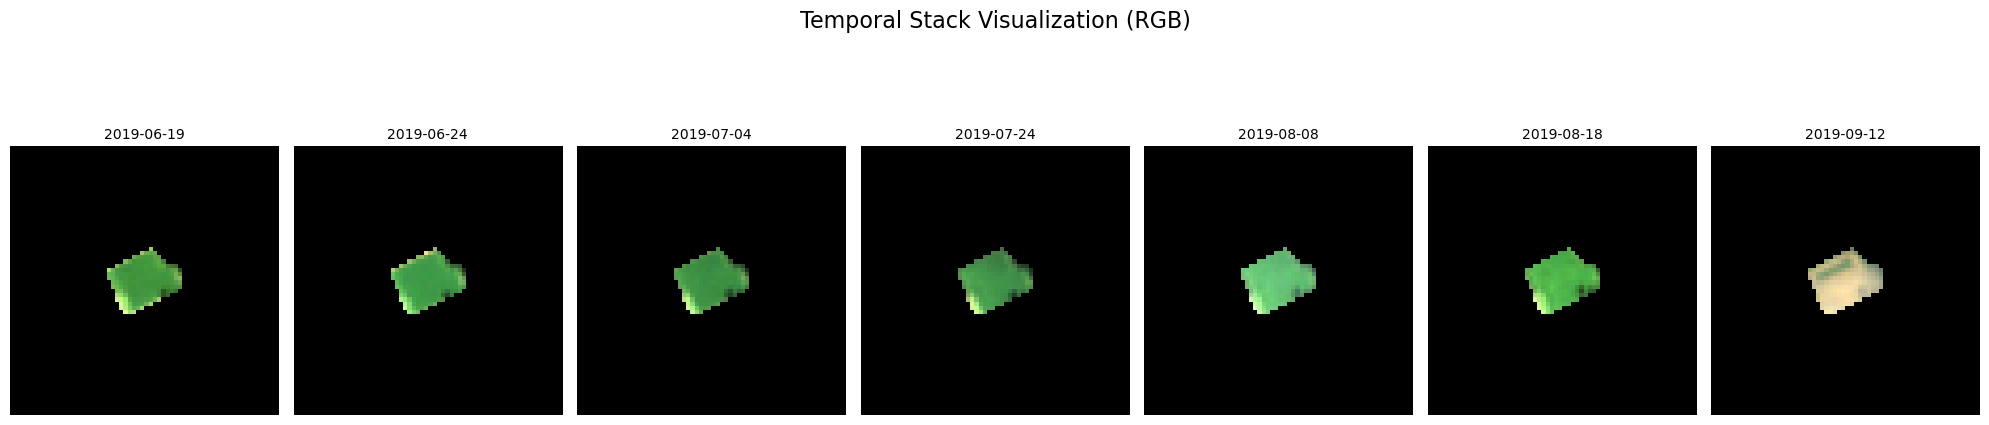

In [17]:
visualize_temporal_stack_rgb(temporal_images_train[1410])